In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# url donde el .csv esta guardado
data_url = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv'

# descargamos el dataset y lo colocamos en un DataFrame de pandas
data = pd.read_csv(data_url, skiprows=1)

# cambiamos los nombres para un facilitar el uso
old_column_names = data.columns
column_names = ['year', 'month', 'day', 'extent', 'missing', 'data product']

data = data.rename(columns={old_column_names[0]: column_names[0], 
                            old_column_names[1]: column_names[1],
                            old_column_names[2]: column_names[2],
                            old_column_names[3]: column_names[3], 
                            old_column_names[4]: column_names[4],
                            old_column_names[5]: column_names[5]})

In [49]:
data.head()

,year,month,day,extent,missing,data product
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


In [50]:
data.tail()

,year,month,day,extent,missing,data product
13955,2021,7,20,7.338,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.07.19/nt_202...
13956,2021,7,21,7.258,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.07.20/nt_202...
13957,2021,7,22,7.195,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.07.21/nt_202...
13958,2021,7,23,7.113,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.07.22/nt_202...
13959,2021,7,24,7.104,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.07.23/nt_202...


In [51]:
# create DateTime column
data['date'] = pd.to_datetime(data['year'].astype(str)+'/'+data['month'].astype(str)+'/'+data['day'].astype(str))

In [61]:
data['rolling_avg'] = data['extent'].rolling(window=21, center=True).mean()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13960 entries, 0 to 13959
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          13960 non-null  int64         
 1   month         13960 non-null  int64         
 2   day           13960 non-null  int64         
 3   extent        13960 non-null  float64       
 4   missing       13960 non-null  float64       
 5   data product  13960 non-null  object        
 6   date          13960 non-null  datetime64[ns]
 7   rolling_avg   13940 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 872.6+ KB


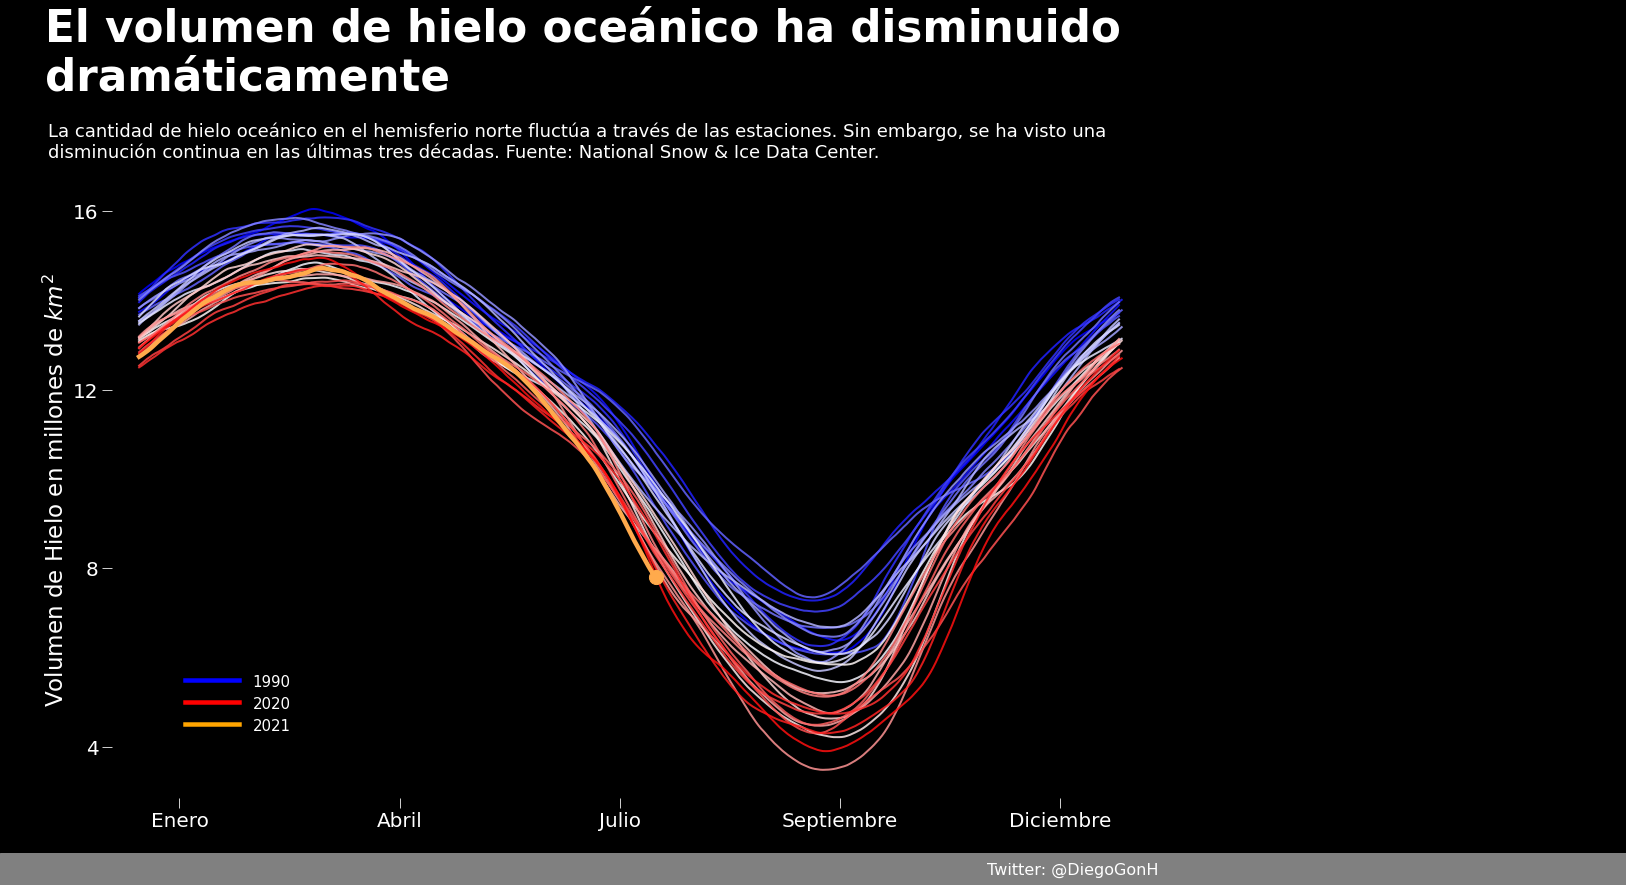

In [293]:
year_o = 1990
year_f = 2021

with plt.style.context('dark_background'):
    
    fig, ax = plt.subplots(1,1, figsize=(16,12.5)) 

    # don't show lines delimiting the graph
    for location in ['left', 'right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)
    
    for year in np.arange(year_o,year_f):
        # get data
        mdf = data[data['year']==year]
        r = (year - year_o)/(year_f-year_o)
        # graficamos cada linea, y añadimos labels solo al primer y ultimo año
        if year == year_o:
            ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], label=f'{year}', 
                     c=plt.cm.bwr(r), alpha=0.85, linewidth=2,zorder=-1)
        elif year == year_f-1:
            ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], label=f'{year}', 
                     c=plt.cm.bwr(r), alpha=0.85, linewidth=2,zorder=-1)
        else:
            ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], 
                     c=plt.cm.bwr(r), alpha=0.85, linewidth=2,zorder=-1)
            
    # plot last year
    mdf = data[data['year']==2021]
    ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], label=f'{year}', 
                     c='#FFAA4C', alpha=1, linewidth=4.5)
    
    ax.scatter(np.arange(mdf['date'].size)[-11], mdf['rolling_avg'].values[-11], 
                     c='#FFAA4C', s=200, zorder=1)


    # change the color of the axes' tick labels
    ax.tick_params(axis='x', colors='white', size=10)
    ax.tick_params(axis='y', colors='white', size=10)

    # set the ticks and labels
    x_ticks_custom = np.linspace(15,350,5)
    x_ticks_custom2 = np.linspace(15,342,5)
    months_list = ['Enero', 'Febrero', 'Marzo', 
                   'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 
                   'Octubre', 'Noviembre', 'Diciembre']
    ax.set_xticks(x_ticks_custom2)
    m_list=[]
    for x in x_ticks_custom:
        m_list.append(months_list[int(x/30.)])
    ax.set_xticklabels(m_list, size=20)
    
    ax.set_yticks([4,8,12,16])
    ax.set_yticklabels([4,8,12,16], size=20)
    
    # Add title and subtitle
    ax.text(-35, 18.7, s='El volumen de hielo oceánico ha disminuido \ndramáticamente', size=43.7, weight='bold')
    ax.text(-33.7, 17.2, 
            s='La cantidad de hielo oceánico en el hemisferio norte fluctúa a través de las estaciones. Sin embargo, se ha visto una \ndisminución continua en las últimas tres décadas. Fuente: National Snow & Ice Data Center.', 
            size=18)


    # add authorship
    ax.text(-49, 1.15, ' ' * 300,
                    color='white',
                    backgroundcolor='grey',
                    size=17)
    ax.text(315, 1.14,'Twitter: @DiegoGonH',
                    color='white',
                    size=16)
    
    ax.set_ylabel(r'Volumen de Hielo en millones de $km^2$', size=23)
    plt.xlim((-10,370))
    
    # adjust
    plt.subplots_adjust(right=0.97, left=0.082, bottom=0.0945, top=0.78)
    
    # add custom legend
    ax.plot([17, 37],[4.5, 4.5],color='orange', linewidth=4.5)
    ax.plot([17, 37],[5.0, 5.0],color='red', linewidth=4.5)
    ax.plot([17, 37],[5.5, 5.5],color='blue', linewidth=4.5)
    ax.text(42, 5.35, '1990', color='white', size=15)
    ax.text(42.445, 5.35-0.5, '2020', color='white', size=15)
    ax.text(42.4, 5.35-1, '2021', color='white', size=15)


    plt.savefig('hielo_oceanico.jpg', dpi=128)

    plt.show()